# [TEMPLATE] DATASET DEPURADO

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

/home/nicolas/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [11]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [12]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [23]:
df['anio'] = df['fecha'].dt.year

In [24]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,-1,2,1,...,NaN,NaN,2015-08-23,False,False,False,False,False,2273000,2015
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Otros,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3600000,2013
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,NaN,NaN,2015-10-17,False,False,False,False,False,1200000,2015
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,19.301890,-99.688015,2012-03-09,False,False,False,True,True,650000,2012
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,NaN,NaN,2016-06-07,False,False,False,False,False,1150000,2016


In [17]:
df['tipodepropiedad'] = df['tipodepropiedad'].map(lambda x:x if x in ['Casa','Apartamento'] else 'Otros')

In [26]:
df = df.rename(columns={"tipodepropiedad":"Tipo de propiedad"})

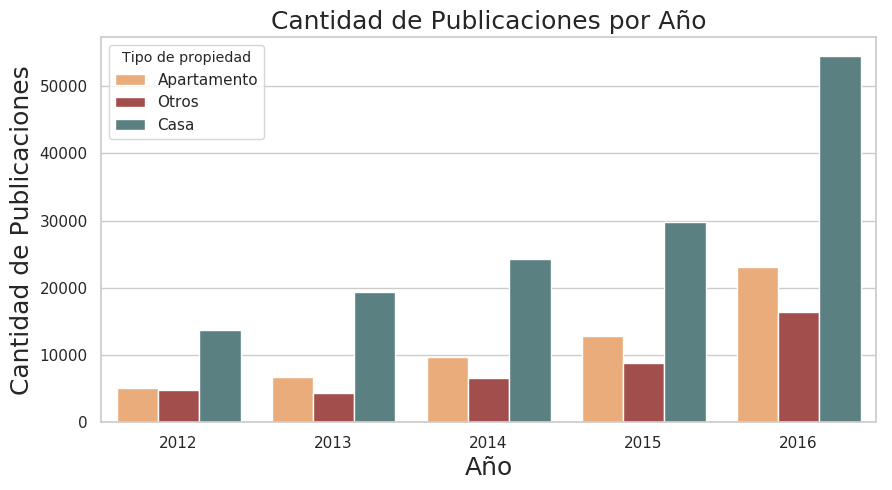

In [29]:
paleta = sns.color_palette(["#FCAA67","#B0413E","#548687","#473335"])

plt.figure(figsize=(10, 5))
g = sns.countplot(x='anio',hue='Tipo de propiedad', data=df, palette=paleta)
g.set_title("Cantidad de Publicaciones por Año", fontsize=18)
g.set_xlabel("Año", fontsize=18)
g.set_ylabel("Cantidad de Publicaciones", fontsize=18)
g.figure.savefig("Cantidad de publicaciones por anio.png", bbox_inches='tight')